<a href="https://colab.research.google.com/github/naveedilyas/CASA-Crowd/blob/main/Md_Deep_Learning_10_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00


In [ ]:
# import zipfile
# with zipfile.ZipFile("/content/drive/MyDrive/CT_Data/CT_Data/Dataset/Train_Valid_MD.zip", 'r') as zip_ref:
#     zip_ref.extractall("/content/drive/MyDrive/CT_Data/CT_Data/Dataset/Train_Valid_MD/")

In [ ]:
import pydicom
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision.transforms import transforms
from torchvision import models
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_dir_train = "/content/drive/MyDrive/MD_Dataset_Code/Dataset/Train_Valid_MD/Train_Valid_MD/Train/"
root_dir_valid = "/content/drive/MyDrive/MD_Dataset_Code/Dataset/Train_Valid_MD/Train_Valid_MD/Valid/"

In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
import pydicom

root_dir = 'path/to/dicom/images'

mean = np.zeros(5)
std = np.zeros(5)
count = 0

for filename in os.listdir(root_dir):
    if filename.endswith('.dcm'):
        dcm = pydicom.dcmread(os.path.join(root_dir, filename))
        img_array = dcm.pixel_array.astype(np.float32)
        img_array /= np.max(img_array)  # Normalize pixel values to [0, 1]
        img_tensor = torch.from_numpy(img_array)
        mean += torch.mean(img_tensor, dim=(1, 2))
        std += torch.std(img_tensor, dim=(1, 2))
        count += 1

mean /= count
std /= count

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")


In [ ]:
os.listdir(root_dir_valid)

['Images', 'Labels']

In [ ]:
mean = np.zeros(5)
std = np.zeros(5)
count = 0
for folder in os.listdir(root_dir_valid):
  for files in os.listdir(os.path.join(root_dir_valid,folder)):
    if files.endswith('.dcm'):
      # print(files)
      dcm = pydicom.dcmread(os.path.join(root_dir_valid,folder,files))
      img_array = dcm.pixel_array.astype(np.float32)
      print(img_array.shape)
      print(np.min(img_array))
      print(np.max(img_array))
      img_array = img_array/np.max(img_array)
      # print(img_array)
      img_tensor = torch.from_numpy(img_array)
      # print(img_tensor.shape)
      mean += torch.mean(img_tensor, dim=(1, 2)).numpy()
      std += torch.mean(img_tensor,dim=(1,2)).numpy()
      break
mean = mean/len(root_dir_valid)
std = std/len(root_dir_valid)

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

(5, 1260, 1260)
3598.0
62339.0
Mean: [0.00225649 0.0022598  0.00218989 0.00216021 0.00217413]
Standard deviation: [0.00225649 0.0022598  0.00218989 0.00216021 0.00217413]


In [ ]:
path= "/content/drive/MyDrive/MD_Dataset_Code/Dataset/Train_Valid_MD/Train_Valid_MD/Valid/Labels/1.3.6.1.4.1.56125.2.32.121.Au/1.3.6.1.4.1.56125.2.32.121.Au.687483.dcm"
dcm = pydicom.dcmread(path).pixel_array.astype(np.float32) 
print(dcm.shape)
print(np.min(dcm))
print(np.max(dcm)) 

(1260, 1260)
0.0
65535.0


In [ ]:
def label_list(path_to_labels):
  # Au_list, Ca_list, Gd_list,I_list,Lipid_list,Water_list = [],[],[],[],[],[]
  All_labels = []
  for folder in os.listdir(path_to_labels):
    a = os.path.join(path_to_labels,folder)
    for files in os.listdir(a):
      path = os.path.join(a,files)
      label = path.split('/')[-2]
      # print(label)
      if label == '1.3.6.1.4.1.56125.2.32.121.Au':
        All_labels.append(path)
      if label == '1.3.6.1.4.1.56125.2.32.121.Ca':
        All_labels.append(path) 
      if label == '1.3.6.1.4.1.56125.2.32.121.Gd':
        All_labels.append(path)
      if label == '1.3.6.1.4.1.56125.2.32.121.I':
        All_labels.append(path) 
      if label == '1.3.6.1.4.1.56125.2.32.121.Lipid':
        All_labels.append(path)
      if label == '1.3.6.1.4.1.56125.2.32.121.Water':
        All_labels.append(path)    
  # labels = [[Au_list[i], Ca_list[i], Gd_list[i], I_list[i], Lipid_list[i], Water_list[i]] for i in range(len(Water_list))]
  # labels = np.concatenate([labels], axis=0)
  # labels = []
  # for i in range(0,len(Water_list)):
  #   labels.append([Au_list[i],Ca_list[i],Gd_list[i],I_list[i],Lipid_list[i],Water_list[i]])
  return All_labels
a=label_list((os.path.join(root_dir_train,'Labels')))
# print(len(a))
count = 0
for labels_path in a:
  # print(labels_path)
  ct_array = pydicom.dcmread(labels_path).pixel_array.astype(np.float32)
  print(ct_array.shape)
  print(np.min(ct_array))
  print(np.max(ct_array))
  ct_array = ct_array/np.max(ct_array)
  ct_tensor = torch.from_numpy(ct_array)
  mean += torch.mean(ct_tensor,dim=(0,1)).numpy()
  std += torch.std(ct_tensor,dim=(0,1)).numpy()
  break 



(1260, 1260)
0.0
65534.0


In [ ]:
mean = np.zeros(5)
std = np.zeros(5)
count = 0
for folder in os.listdir(root_dir_valid):
  for files in os.listdir(os.path.join(root_dir_valid,folder)):
    if files.endswith('.dcm'):
      # print(files)
      dcm = pydicom.dcmread(os.path.join(root_dir_valid,folder,files))
      img_array = dcm.pixel_array.astype(np.float32)
      # img_array = img_array.squeeze(1)
      print(img_array.shape)
      print(np.min(img_array))
      print(np.max(img_array))
      img_array = img_array/np.max(img_array)
      print(img_array)
      img_tensor = torch.from_numpy(img_array)
      # print(img_tensor.shape)
      mean += torch.mean(img_tensor, dim=(1, 2)).numpy()
      std += torch.std(img_tensor,dim=(1,2)).numpy()
      break
mean = mean/len(root_dir_valid)
std = std/len(root_dir_valid)

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

(5, 1260, 1260)
3598.0
62339.0
[[[0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  ...
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]]

 [[0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  ...
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]
  [0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.15887326]]

 [[0.15887326 0.15887326 0.15887326 ... 0.15887326 0.15887326 0.1

In [ ]:
tensor_3x2x2 = torch.tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])
print(torch.max(tensor_3x2x2).item())

12


In [ ]:
tensor_2x2 = torch.tensor([
    [1, 2],
    [3, 4]
])
print(torch.max(tensor_2x2).item())

4


In [ ]:
mean = np.zeros(5)
std = np.zeros(5)
count = 0
for folder in os.listdir(root_dir_valid):
  for files in os.listdir(os.path.join(root_dir_valid,folder)):
    if files.endswith('.dcm'):
      # print(files)
      dcm = pydicom.dcmread(os.path.join(root_dir_valid,folder,files))
      img_array = dcm.pixel_array.astype(np.float32)
      # print(img_array.shape)
      # print(np.max(img_array))
      img_array = img_array/np.max(img_array)
      # print(img_array)
      img_tensor = torch.from_numpy(img_array)
      # print(img_tensor.shape)
      mean += torch.mean(img_tensor, dim=(0, 1, 2)).numpy()
      std += torch.mean(img_tensor,dim=(0, 1, 2)).numpy()
      break
mean = mean/len(root_dir_valid)
std = std/len(root_dir_valid)

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

Mean: [0.0022081 0.0022081 0.0022081 0.0022081 0.0022081]
Standard deviation: [0.0022081 0.0022081 0.0022081 0.0022081 0.0022081]


In [ ]:
# def label_list(path_to_labels):
#   Au_list, Ca_list, Gd_list,I_list,Lipid_list,Water_list = [],[],[],[],[],[]
#   for folder in os.listdir(path_to_labels):
#     a = os.path.join(path_to_labels,folder)
#     for files in os.listdir(a):
#       path = os.path.join(a,files)
#       label = path.split('/')[-2]
#       # print(label)
#       if label == '1.3.6.1.4.1.56125.2.32.121.Au':
#         Au_list.append(path)
#       if label == '1.3.6.1.4.1.56125.2.32.121.Ca':
#         Ca_list.append(path) 
#       if label == '1.3.6.1.4.1.56125.2.32.121.Gd':
#         Gd_list.append(path)
#       if label == '1.3.6.1.4.1.56125.2.32.121.I':
#         I_list.append(path) 
#       if label == '1.3.6.1.4.1.56125.2.32.121.Lipid':
#         Lipid_list.append(path)
#       if label == '1.3.6.1.4.1.56125.2.32.121.Water':
#         Water_list.append(path)    
#   labels = [[Au_list[i], Ca_list[i], Gd_list[i], I_list[i], Lipid_list[i], Water_list[i]] for i in range(len(Water_list))]  
#   # labels = []
#   # for i in range(0,len(Water_list)):
#   #   labels.append([Au_list[i],Ca_list[i],Gd_list[i],I_list[i],Lipid_list[i],Water_list[i]])
#   return labels

In [ ]:
def label_list(path_to_labels):
  Au_list, Ca_list, Gd_list,I_list,Lipid_list,Water_list = [],[],[],[],[],[]
  for folder in os.listdir(path_to_labels):
    a = os.path.join(path_to_labels,folder)
    for files in os.listdir(a):
      path = os.path.join(a,files)
      label = path.split('/')[-2]
      # print(label)
      if label == '1.3.6.1.4.1.56125.2.32.121.Au':
        Au_list.append(path)
      if label == '1.3.6.1.4.1.56125.2.32.121.Ca':
        Ca_list.append(path) 
      if label == '1.3.6.1.4.1.56125.2.32.121.Gd':
        Gd_list.append(path)
      if label == '1.3.6.1.4.1.56125.2.32.121.I':
        I_list.append(path) 
      if label == '1.3.6.1.4.1.56125.2.32.121.Lipid':
        Lipid_list.append(path)
      if label == '1.3.6.1.4.1.56125.2.32.121.Water':
        Water_list.append(path)    
  labels = [[Au_list[i], Ca_list[i], Gd_list[i], I_list[i], Lipid_list[i], Water_list[i]] for i in range(len(Water_list))]  
  # labels = []
  # for i in range(0,len(Water_list)):
  #   labels.append([Au_list[i],Ca_list[i],Gd_list[i],I_list[i],Lipid_list[i],Water_list[i]])
  return labels

In [ ]:
class Material_MD(nn.Module):
  def __init__(self,root_dir,transform=None):
    self.imag_path = os.path.join(root_dir, 'Images')
    self.label_path = os.path.join(root_dir, "Labels")
    self.ct_images = os.listdir(self.imag_path)
    self.labels_list = label_list(self.label_path)
    self.transform = transform
    

  def __len__(self):
    return len(self.ct_images)

  def __getitem__(self, idx):
    norm = 1
    ct_filename = self.ct_images[idx]
    ct_image = (pydicom.read_file(os.path.join(self.imag_path,ct_filename)).pixel_array)/norm
    ct_image = torch.from_numpy(ct_image)

    ct_label1 = (pydicom.read_file(self.labels_list[idx][0]).pixel_array)/norm
    ct_label2 = (pydicom.read_file(self.labels_list[idx][1]).pixel_array)/norm
    ct_label3 = (pydicom.read_file(self.labels_list[idx][2]).pixel_array)/norm
    ct_label4 = (pydicom.read_file(self.labels_list[idx][3]).pixel_array)/norm
    ct_label5 = (pydicom.read_file(self.labels_list[idx][4]).pixel_array)/norm
    ct_label6 = (pydicom.read_file(self.labels_list[idx][5]).pixel_array)/norm
    # print("ct_label1",ct_label1)
    ct_label_all = [ct_label1,ct_label2,ct_label3,ct_label4,ct_label5,ct_label6]
    ct_label_all = np.array(ct_label_all)
    ct_label_all = torch.from_numpy(ct_label_all).float()
    # print(ct_label_all.shape)
    if self.transform is not None:
        ct_image = self.transform(ct_image)
        # ct_label_all = self.transform(ct_label_all)


    return ct_image, ct_label_all

In [ ]:
# train_dataset = Material_MD(root_dir_train,transform = None)
# valid_dataset = Material_MD(root_dir_valid,transform = None)
# a,b = next(iter(train_dataset))
# print(a.shape,b.shape)
count =0
mean_images= np.zeros(5)
std_images = np.zeros(5)
mean_labels= np.zeros(6)
std_labes = np.zeros(6)
for image, label in valid_dataset:
  # print(image.shape,label.shape)
  # print(torch.max(image))
  # print(torch.max(label))
  # print("Before Image",image)
  # print("Before label",label)
  image_tensor = image/torch.max(image)
  label_tensor = label /torch.max(label)
  # print("After Image",image)
  # print("After label",label)
  mean_labels += torch.mean(label_tensor, dim=(0, 1, 2)).numpy()
  std_labes += torch.std(label_tensor,dim=(0, 1, 2)).numpy()

  mean_images += torch.mean(image_tensor, dim=(0, 1, 2)).numpy()
  std_images += torch.std(image_tensor,dim=(0, 1, 2)).numpy()
  count+=1

 

mean_labels = mean_labels/count
std_labes = std_labes/count

mean_images = mean_images/count
std_images = std_images/count

print(f"Mean of labels: {mean_labels}")
print(f"Standard deviation of labels: {std_labes}")

print(f"Mean of images: {mean_images}")
print(f"Standard deviation of images: {std_images}")



Mean of labels: [0.00994696 0.00994696 0.00994696 0.00994696 0.00994696 0.00994696]
Standard deviation of labels: [0.07285886 0.07285886 0.07285886 0.07285886 0.07285886 0.07285886]
Mean of images: [0.18996047 0.18996047 0.18996047 0.18996047 0.18996047]
Standard deviation of images: [0.11368609 0.11368609 0.11368609 0.11368609 0.11368609]


In [ ]:
class Material_MD(nn.Module):
  def __init__(self,root_dir,trans1,trans2):
    self.imag_path = os.path.join(root_dir, 'Images')
    self.label_path = os.path.join(root_dir, "Labels")
    self.ct_images = os.listdir(self.imag_path)
    self.labels_list = label_list(self.label_path)
    self.transform = trans1
    self.label_transform = trans2
    

  def __len__(self):
    return len(self.ct_images)

  def __getitem__(self, idx):
    norm = 1
    ct_filename = self.ct_images[idx]
    ct_image = (pydicom.read_file(os.path.join(self.imag_path,ct_filename)).pixel_array)/norm
    ct_image = torch.from_numpy(ct_image)

    ct_label1 = (pydicom.read_file(self.labels_list[idx][0]).pixel_array)/norm
    ct_label2 = (pydicom.read_file(self.labels_list[idx][1]).pixel_array)/norm
    ct_label3 = (pydicom.read_file(self.labels_list[idx][2]).pixel_array)/norm
    ct_label4 = (pydicom.read_file(self.labels_list[idx][3]).pixel_array)/norm
    ct_label5 = (pydicom.read_file(self.labels_list[idx][4]).pixel_array)/norm
    ct_label6 = (pydicom.read_file(self.labels_list[idx][5]).pixel_array)/norm
    # print("ct_label1",ct_label1)
    ct_label_all = [ct_label1,ct_label2,ct_label3,ct_label4,ct_label5,ct_label6]
    ct_label_all = np.array(ct_label_all)
    ct_label_all = torch.from_numpy(ct_label_all).float()
    if self.transform is not None:
        ct_image = self.transform(ct_image)
        ct_label_all = self.label_transform(ct_label_all)


    return ct_image, ct_label_all

In [ ]:
# Define mean and std for each channel of the labels
label_mean = [np.mean(label_channel) for label_channel in labels]
label_std = [np.std(label_channel) for label_channel in labels]

# Create transforms for image normalization
image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Create transforms for label normalization
label_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=label_mean, std=label_std)
])

In [ ]:
import statistics
a=[24.9138, 25.6821, 21.0750, 19.8047, 21.0898]
statistics.mean(a)
mean = [44.80698]*5
std = [22.51308]*5

22.51308

In [ ]:

# Define your transforms for train and valid
# mean = [0.5]*5
# std = [0.5]*5
mean_img = mean_images
std_img = std_images

mean_label = mean_labels
std_label = std_labes
# mean = [44.80698]*5
# std = [22.51308]*5
mean = np.array(mean)
std = np.array(std)
transform_train = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # transforms.RandomCrop(size=(260, 260)),
    transforms.GaussianBlur(kernel_size=3),
    # transforms.Normalize(mean=mean.astype(np.float32), std=(std + 1e-6).astype(np.float32))
    transforms.Normalize(mean=mean_images, std=std_images)
    # transforms.ToTensor()
])

transform_train_label = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # transforms.RandomCrop(size=(260, 260)),
    transforms.GaussianBlur(kernel_size=3),
    # transforms.Normalize(mean=mean.astype(np.float32), std=(std + 1e-6).astype(np.float32))
    transforms.Normalize(mean=mean_labels, std=std_labes)
    # transforms.ToTensor()
])



transform_valid = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # transforms.RandomCrop(size=(260, 260)),
    transforms.GaussianBlur(kernel_size=3),
    # transforms.ToTensor()
])

In [ ]:
# train_dataset = Material_MD(root_dir_train,transform = None)
valid_dataset = Material_MD(root_dir_valid,transform_train,transform_train_label)
len(valid_dataset)

10

In [ ]:
img,label = valid_dataset[4]
print(torch.min(img))
print(torch.max(img))

print(torch.min(label))
print(torch.max(label))
# for i in range(img.shape[0]): # assuming 5 channels
#     plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
# plt.show()
# img = train_dataset[0][0]
# print(np.min(img.numpy()), np.max(img.numpy()))

tensor(-1.6709, dtype=torch.float64)
tensor(504311.2113, dtype=torch.float64)
tensor(-0.1365)
tensor(788838.2500)


In [ ]:
images = []
for i in range(len(valid_dataset)):
    img, _ = train_dataset[i]  # get the i-th image from the dataset
    images.append(img)

images = torch.stack(images)  # stack all the images to create a tensor of shape (num_images, channels, height, width)
print(images.shape)
mean = images.mean(dim=(1, 2))
std = images.std(dim=(1, 2))

print(mean, std)







# labels = []
# for i in range(len(train_dataset)):
#     img, label = train_dataset[i]  # get the i-th image from the dataset
#     labels.append(label)

# labels = torch.stack(labels)  # stack all the images to create a tensor of shape (num_images, channels, height, width)
# print(labels.shape)
# mean = img.mean(dim=(1, 2))
# std = img.std(dim=(1, 2))
# print(mean,std)

# mean = 0.
# std = 0.
# nb_samples = 0.
# for data,_ in valid_dataset:
#     batch_samples = data.size(0)
#     data = data.view(batch_samples, data.size(1), -1)
#     mean += data.mean(2).sum(0)
#     std += data.std(2).sum(0)
#     nb_samples += batch_samples

# mean /= nb_samples
# std /= nb_samples
# print(mean,std)


# mean = 0.
# std = 0.
# nb_samples = 0.
# for img,_ in valid_dataset:
#     no_of_channels = img.size(0)
#     print(no_of_channels)
#     img = img.view(no_of_channels,img.size(1))
    # data = data.view(batch_samples, data.size(1), -1)
    # mean += data.mean(2).sum(0)
    # std += data.std(2).sum(0)
    # nb_samples += batch_samples
    # break
# mean /= nb_samples
# std /= nb_samples
# print(mean,std)


# self.img_transform = transforms.ColorJitter(brightness=0.2)
# self.transform = Compose([
#             RandomVerticalFlip(),
#             RandomHorizontalFlip(),
#             RandomAffine(degrees=(-20,20),translate=(0.1,0.1),
#                           scale=(0.9,1.1), shear=(-0.2,0.2)),
#             ElasticTransform(alpha=720, sigma=24)])
# self.totensor = transforms.ToTensor()


torch.Size([10, 5, 1260, 1260])
tensor([[10108.8949, 10339.0192, 10530.2533,  ..., 10138.0516, 10067.7746,
          9988.3992],
        [10114.9527, 10334.9740, 10527.9125,  ..., 10208.5179, 10110.3629,
         10004.5106],
        [10120.7549, 10317.4244, 10477.3629,  ..., 10248.2063, 10125.5894,
         10007.5297],
        ...,
        [10066.6011, 10236.6002, 10388.2119,  ..., 10510.9594, 10284.0554,
         10078.9308],
        [10077.2189, 10254.1075, 10398.0411,  ..., 10540.7946, 10300.7644,
         10077.7389],
        [10093.0986, 10282.0308, 10439.8205,  ..., 10565.7471, 10300.1122,
         10076.7825]], dtype=torch.float64) tensor([[1038.3292, 1657.4526, 2074.2473,  ...,  798.7911,  635.4773,
          439.1462],
        [1060.3310, 1647.3136, 2068.2923,  ..., 1025.9246,  792.0126,
          518.2183],
        [1091.7398, 1596.1465, 1908.8413,  ..., 1158.9826,  854.6947,
          529.5644],
        ...,
        [ 825.2865, 1279.0941, 1610.4930,  ..., 1996.9202, 1455.3

In [ ]:
images = []
for i in range(len(train_dataset)):
    img, _ = train_dataset[i]  # get the i-th image from the dataset
    images.append(img)

images = torch.stack(images)  # stack all the images to create a tensor of shape (num_images, channels, height, width)
print(images.shape)
mean = img.mean(dim=(1, 2))
std = img.std(dim=(1, 2))


torch.Size([70, 5, 1260, 1260])


In [ ]:
print(mean.shape,std)

torch.Size([70, 1260]) tensor([[1038.3292, 1657.4526, 2074.2473,  ...,  798.7911,  635.4773,
          439.1462],
        [1060.3310, 1647.3136, 2068.2923,  ..., 1025.9246,  792.0126,
          518.2183],
        [1091.7398, 1596.1465, 1908.8413,  ..., 1158.9826,  854.6947,
          529.5644],
        ...,
        [1285.3821, 2047.0842, 2666.1370,  ...,  256.0244,  246.7546,
          242.2523],
        [1208.6761, 2049.8590, 2633.7458,  ...,  245.1252,  238.8374,
          181.3394],
        [1236.1258, 2010.6843, 2519.8305,  ...,  222.2046,  221.7800,
          123.0452]], dtype=torch.float64)


torch.Size([5, 1260, 1260])


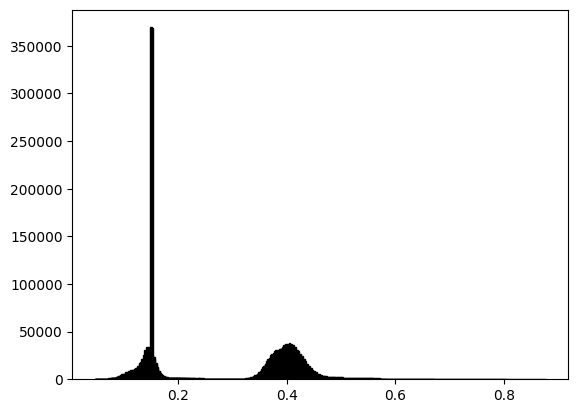

0.046600341796875 0.8769989013671875


In [ ]:
#@title Without Normalization
img,_ = train_dataset[0]
print(img.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
plt.show()
img = train_dataset[0][0]
print(np.min(img.numpy()), np.max(img.numpy()))

torch.Size([5, 1260, 1260])


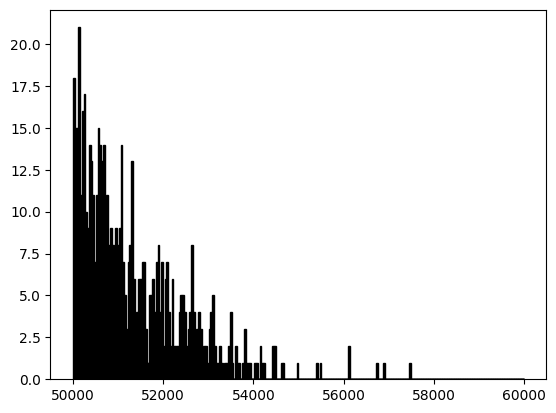

3054.0 57475.0


In [ ]:
# @title Without Normalization
img,_ = train_dataset[0]
print(img.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256,range= (50000.0,60000.0), fc='k', ec='k')
plt.show()
img = train_dataset[0][0]
print(np.min(img.numpy()), np.max(img.numpy()))

torch.Size([5, 1260, 1260])


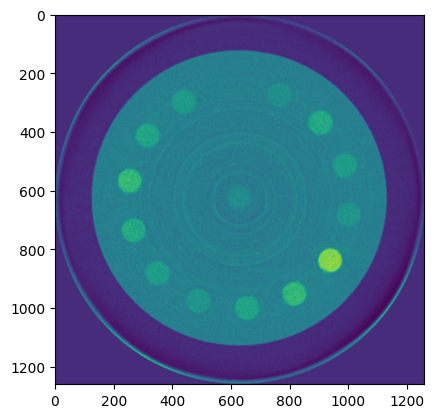

In [ ]:
img,label = train_dataset[0]
print(img.shape)
img = img.permute(1,2,0)
plt.imshow(img[:,:,1])
plt.show()

torch.Size([6, 1260, 1260])


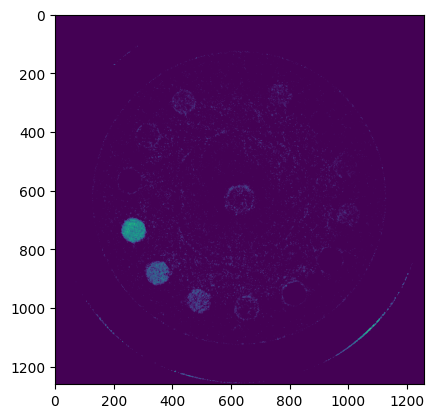

In [ ]:
img,label = train_dataset[0]
print(label.shape)
label = label.permute(1,2,0)
plt.imshow(label[:,:,2]) # Gadolinimim
plt.show()

torch.Size([6, 1260, 1260])


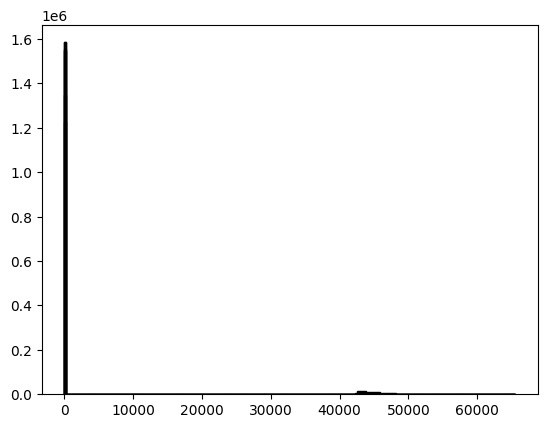

3054.0 57475.0


In [ ]:
img,label = train_dataset[0]
print(label.shape)
for i in range(label.shape[0]): # assuming 5 channels
    plt.hist(label[i].ravel(), bins=256, fc='k', ec='k')
plt.show()
label = train_dataset[0][0]
print(np.min(label.numpy()), np.max(label.numpy()))

torch.Size([5, 1260, 1260])


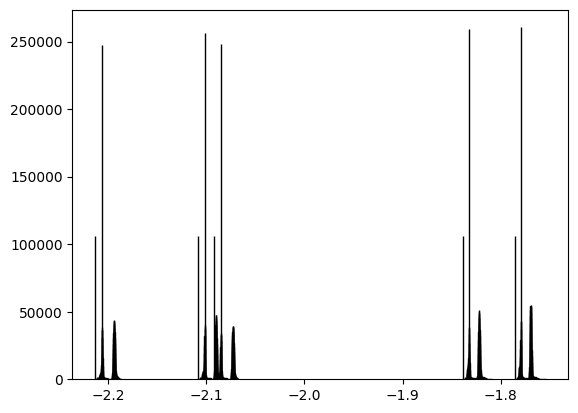

-2.213156472958439 -1.7513171152667726


In [ ]:
#@title WIth Normalization
img,_ = train_dataset[0]
print(img.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
plt.show()
img = train_dataset[0][0]
print(np.min(img.numpy()), np.max(img.numpy()))

torch.Size([5, 1260, 1260])


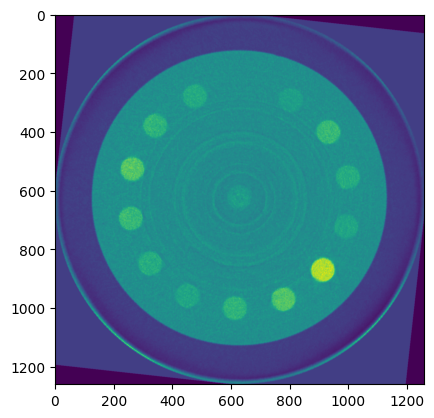

In [ ]:
img,_ = train_dataset[0]
print(img.shape)
img = img.permute(1,2,0)
plt.imshow(img[:,:,1])
plt.show()

torch.Size([5, 260, 260])


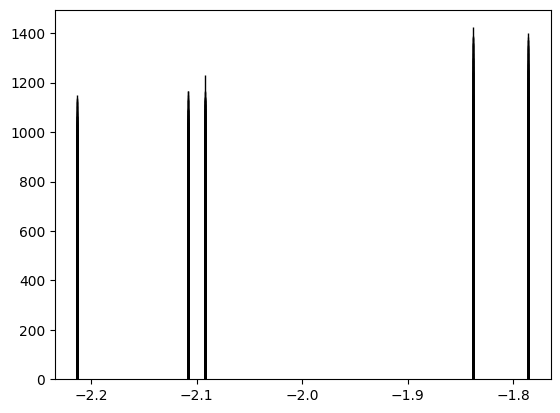

-2.213156379010235 -1.7854649770083746


In [ ]:
img,_ = train_dataset[0]
print(img.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
plt.show()
img = train_dataset[0][0]
print(np.min(img.numpy()), np.max(img.numpy()))

torch.Size([5, 260, 260])


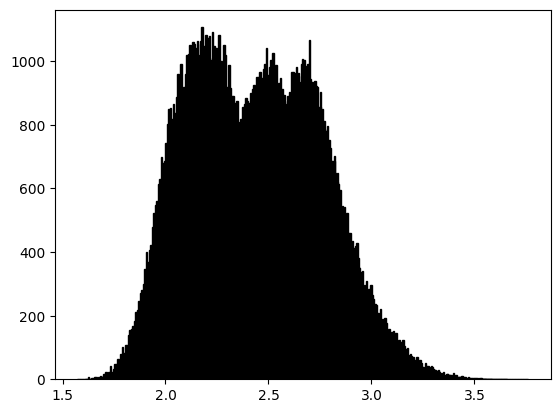

-0.7138318074138189 6.230951864370667


In [ ]:
img,_ = train_dataset[0]
print(img.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
plt.show()
img = train_dataset[0][0]
print(np.min(img.numpy()), np.max(img.numpy()))

torch.Size([5, 1260, 1260])


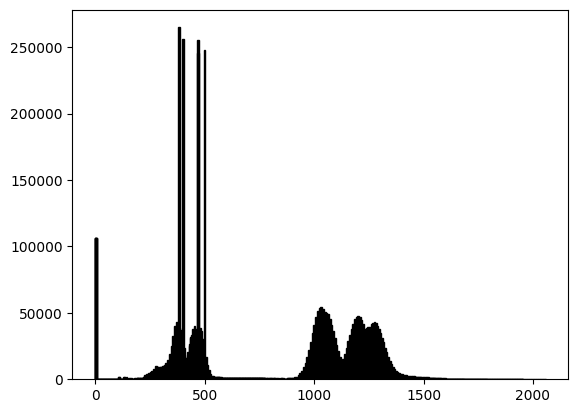

-2.213156472958439 2236.154578481603


In [ ]:
img,_ = train_dataset[0]
print(img.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
plt.show()
img = train_dataset[0][0]
print(np.min(img.numpy()), np.max(img.numpy()))

In [ ]:
means = []
stds = []
import math
for i in range(5): # assuming 5 channels
    channel_sum = 0
    channel_pixels = 0
    for data in train_dataset:
        img, _ = data
        channel_sum += img[i, :, :].sum()
        channel_pixels += img[i, :, :].numel()

    channel_mean = channel_sum / channel_pixels
    means.append(channel_mean)
    
    channel_var = 0
    for data in train_dataset:
        img, _ = data
        channel_var += ((img[i, :, :] - channel_mean) ** 2).sum()

    channel_std = math.sqrt(channel_var / channel_pixels)
    stds.append(channel_std)
print(means)
print(stds)

[tensor(15427.9644, dtype=torch.float64), tensor(15533.3515, dtype=torch.float64), tensor(14967.9569, dtype=torch.float64), tensor(14811.7518, dtype=torch.float64), tensor(15136.2407, dtype=torch.float64)]
[8459.622369464047, 8696.046686729178, 7778.358533483785, 7584.299301093727, 8070.282106966368]


In [ ]:
images = []
for i in range(len(train_dataset)):
    img, _ = train_dataset[i]  # get the i-th image from the dataset
    images.append(img)

images = torch.stack(images)  # stack all the images to create a tensor of shape (num_images, channels, height, width)
print(images.shape)
mean = img.mean(dim=(1, 2))
std = img.std(dim=(1, 2))


torch.Size([70, 5, 1260, 1260])


In [ ]:
print(mean,std)

tensor([45.7986, 45.8545, 44.4339, 43.8309, 44.1170], dtype=torch.float64) tensor([24.9138, 25.6821, 21.0750, 19.8047, 21.0898], dtype=torch.float64)


In [ ]:
images = []
for i in range(len(train_dataset)):
    img, _ = train_dataset[i]  # get the i-th image from the dataset
    images.append(img)

images = torch.stack(images)  # stack all the images to create a tensor of shape (num_images, channels, height, width)
mean = images.mean()
std = images.std()



In [ ]:
print(mean, std)

tensor(67.3892, dtype=torch.float64) tensor(34.0416, dtype=torch.float64)


torch.Size([5, 1260, 1260])


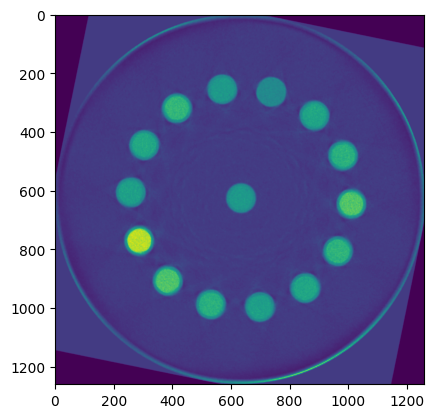

In [ ]:
img,_ = valid_dataset[0]
print(img.shape)
img = img.permute(1,2,0)
plt.imshow(img[:,:,1])
plt.show()

torch.Size([5, 1260, 1260]) torch.Size([6, 1260, 1260])


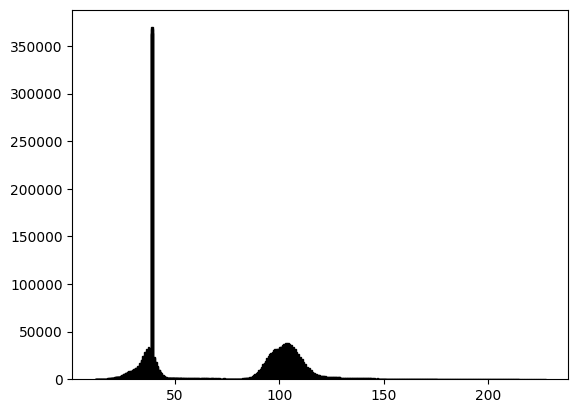

In [ ]:
img,label = train_dataset[8]
print(img.shape,label.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
plt.show()

torch.Size([5, 1260, 1260]) torch.Size([6, 1260, 1260])


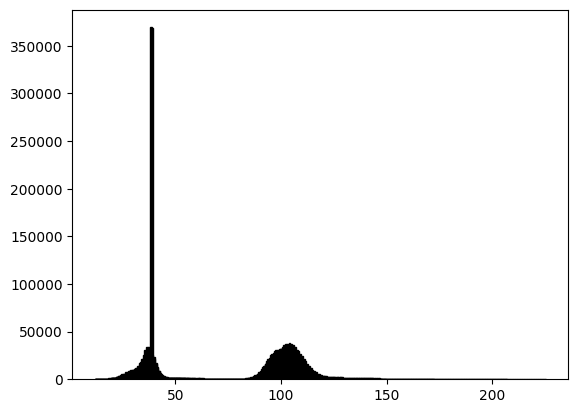

In [ ]:
img,label = train_dataset[0]
print(img.shape,label.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
plt.show()

torch.Size([5, 1260, 1260]) torch.Size([6, 1260, 1260])


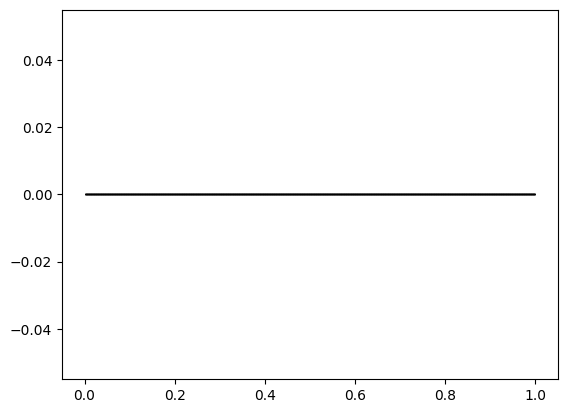

In [ ]:
img,label = train_dataset[0]
print(img.shape,label.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256,range=(0.0, 1.0), fc='k', ec='k')
plt.show()


In [ ]:
img = train_dataset[0][0]
print(np.min(img.numpy()), np.max(img.numpy()))

11.976470588235294 225.3921568627451


In [ ]:
images = []
for i in range(len(train_dataset)):
    img, _ = train_dataset[i]  # get the i-th image from the dataset
    images.append(img)

images = torch.stack(images)  # stack all the images to create a tensor of shape (num_images, channels, height, width)
print(images.shape)
mean = images.mean(dim=(0,2,3))
std = images.std(dim=(0,2,3))

torch.Size([70, 5, 260, 260])


In [ ]:
images = []
for i in range(len(train_dataset)):
    img, _ = train_dataset[i]  # get the i-th image from the dataset
    images.append(img)

images = torch.stack(images)  # stack all the images to create a tensor of shape (num_images, channels, height, width)
print(images.shape)
mean = img.mean(dim=(1, 2))
std = img.std(dim=(1, 2))

torch.Size([70, 5, 1260, 1260])


In [ ]:
print(mean,std)

tensor([45.7986, 45.8545, 44.4339, 43.8309, 44.1170], dtype=torch.float64) tensor([24.9138, 25.6821, 21.0750, 19.8047, 21.0898], dtype=torch.float64)


In [ ]:
print(mean,std)

tensor([73.7374, 74.5041, 70.9188, 70.1242, 72.3504], dtype=torch.float64) tensor([35.0714, 36.2801, 32.2250, 31.4695, 33.5337], dtype=torch.float64)


torch.Size([5, 260, 260]) torch.Size([6, 260, 260])


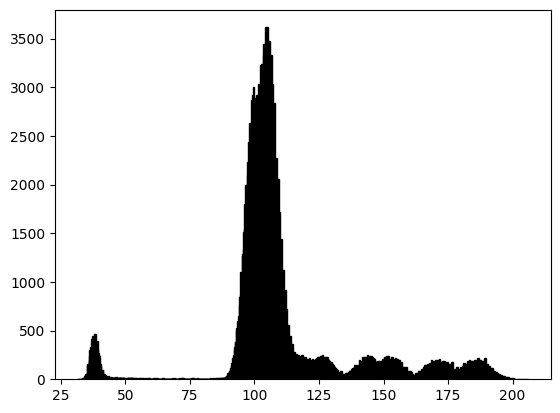

In [ ]:
img,label = train_dataset[0]
print(img.shape,label.shape)
for i in range(img.shape[0]): # assuming 5 channels
    plt.hist(img[i].ravel(), bins=256, fc='k', ec='k')
plt.show()

In [ ]:
img = train_dataset[0][0]
print(np.min(img.numpy()), np.max(img.numpy()))

86.92110120825153 203.80611178322198


In [ ]:
img,_ = train_dataset[0]
# print(img)
plt.hist(img.numpy().ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()


RuntimeError: ignored

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomCrop(size=(260, 260)),
    transforms.GaussianBlur(kernel_size=3),
    transforms.Normalize(mean=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
])

# Load the dataset
train_dataset = CustomDataset(..., transform=transform_train)

# Get a sample image and plot a histogram of its pixel values
img, _ = train_dataset[0]
plt.hist(img.numpy().ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()


In [ ]:
print(len(train_dataset),len(valid_dataset))

70 10


In [ ]:
a,b = next(iter(train_dataset))
print(a.shape,b.shape)

torch.Size([5, 260, 260]) torch.Size([6, 260, 260])


In [ ]:
a,b = next(iter(valid_dataset))
print(a.shape,b.shape)

torch.Size([5, 1260, 1260]) torch.Size([6, 1260, 1260])


In [ ]:
# Create dataloaders for train and valid
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)

In [ ]:
a,b = next(iter(train_loader))
print(a.shape, b.shape)
print("Number of Iterations in each epoch",len(train_loader))

torch.Size([2, 5, 260, 260]) torch.Size([2, 6, 260, 260])
Number of Iterations in each epoch 35


In [ ]:
a,b = next(iter(valid_loader))
print(a.shape, b.shape)
print("Number of Iterations in each epoch",len(valid_loader))

torch.Size([1, 5, 1260, 1260]) torch.Size([1, 6, 1260, 1260])
Number of Iterations in each epoch 10


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Model Preperation



In [ ]:
#@title Default title text
# class ResNet50(nn.Module):
#   def __init__(self,num_classes=6):
#     super().__init__()
#     self.resnet50 = models.resnet50(pretrained=True)
#     self.resnet50.conv1 = nn.Conv2d(5, 64, kernel_size=7, stride=2, padding=3, bias=False)
#     self.resnet50.fc = nn.Linear(2048, num_classes)

#   def forward(self,x):
#     x = self.resnet50(x)
#     return x  

# if __name__ == '__main__':
#     model = ResNet50()
#     input = torch.randn(1, 5, 400, 400)
#     output = model(input)
#     print(input.size())
#     print(output.size())

In [ ]:
#@title Channel_Attention_VGG
# import torch.nn as nn
# import torch
# import torch.nn.functional as F

# class CAM_Module(nn.Module):
#     def __init__(self, in_dim):
#         super(CAM_Module, self).__init__()
#         self.chanel_in = in_dim


#         self.gamma = nn.Parameter(torch.zeros(1))
#         self.softmax  = nn.Softmax(dim=-1)
#     def forward(self,x):
#         m_batchsize, C, height, width = x.size()
#         proj_query = x.view(m_batchsize, C, -1)
#         proj_key = x.view(m_batchsize, C, -1).permute(0, 2, 1)
#         energy = torch.bmm(proj_query, proj_key)
#         energy_new = torch.max(energy, -1, keepdim=True)[0].expand_as(energy)-energy
#         attention = self.softmax(energy_new)
#         proj_value = x.view(m_batchsize, C, -1)

#         out = torch.bmm(attention, proj_value)
#         out = out.view(m_batchsize, C, height, width)

#         out = self.gamma*out + x
#         return out

# class VGG16(nn.Module):
#     def __init__(self, num_classes=6):
#         super(VGG16, self).__init__()
#         self.layer1 = nn.Sequential(
#             nn.Conv2d(5, 64, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU())
#         self.layer2 = nn.Sequential(
#             nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(), 
#             nn.MaxPool2d(kernel_size = 2, stride = 2))
#         self.channel_attntion1 = CAM_Module(64)

#         self.layer3 = nn.Sequential(
#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU())
#         self.layer4 = nn.Sequential(
#             nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size = 2, stride = 2))
#         self.channel_attntion2 = CAM_Module(128)

#         self.layer5 = nn.Sequential(
#             nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU())
#         self.layer6 = nn.Sequential(
#             nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU())
#         self.layer7 = nn.Sequential(
#             nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size = 2, stride = 2))
#         self.layer8 = nn.Sequential(
#             nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(512),
#             nn.ReLU())
#         self.layer9 = nn.Sequential(
#             nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(512),
#             nn.ReLU())
#         self.layer10 = nn.Sequential(
#             nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(512),
#             nn.ReLU())#,
#             #nn.MaxPool2d(kernel_size = 2, stride = 2))
#         self.layer11 = nn.Sequential(
#             nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(512),
#             nn.ReLU())
#         self.layer12 = nn.Sequential(
#             nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(512),
#             nn.ReLU())
#         self.layer13 = nn.Sequential(
#             nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(512),
#             nn.ReLU())#,
#             #nn.MaxPool2d(kernel_size = 2, stride = 2))
#         self.layer14 = nn.Sequential(
#             nn.Conv2d(512, 6, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(6),
#             nn.ReLU()
#             )

        
#         self.dropout = nn.Dropout(0.25)
        
#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.channel_attntion1(out)
#         # print("out 1",out.shape)
#         out = self.layer2(out)
#         out = self.channel_attntion2(out)
#         #print("out 2",out.shape)
#         out = self.layer3(out)
#         #print("out 3",out.shape)
#         out = self.layer4(out)
#         #print("out 4",out.shape)
#         out = self.layer5(out)
#         #print("out 5",out.shape)
#         out = self.layer6(out)
#         # out = self.cam(out)
#         #print("out 6",out.shape)
#         out = self.layer7(out)
#         #print("out 7",out.shape)
#         out = self.layer8(out)
#         #print("out 8",out.shape)
#         out = self.layer9(out)
#         #print("out 9",out.shape)
#         out = self.layer10(out)
#         #print("out 10",out.shape)
#         out = self.layer11(out)
#         #print("out 11",out.shape)
#         out = self.layer12(out)
#         #print("out 12",out.shape)
#         out = self.layer13(out)
#         #print("out 13",out.shape)
#         out=self.dropout(out)
#         out = self.layer14(out)
#         #print("out 14",out.shape)
#         out=F.log_softmax(out)
#         #print(out.shape)
#         return out

# if __name__ == "__main__":
#   input = torch.randn(1,5,900,900)
#   model = VGG16()  # create a Net object with 10 output classes
#   output = model(input)
#   print(output.shape)        

In [ ]:
#@title 2D-UNet
# Creating a UNet for SPCCT (Spectral Photon Counting CT)
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(BasicBlock, self).__init__()
        # self.gn1 = nn.GroupNorm(n_groups, in_channels)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        # self.gn2 = nn.GroupNorm(n_groups, in_channels)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

    def forward(self, x):
        residul = x
        x = self.relu1(x)
        x = self.conv1(x)
        x = self.relu2(x)
        x = self.conv2(x)
        # x = x + residul

        return x

class UNet2D(nn.Module):
    """2d unet for Material Decomposition
    Ref:
        Material Decomposition using 2d-UNet. Naveed Ilyas
    Args:
        input_shape: tuple, (channel,height, width)
    """

    def __init__(self,in_channels=5, out_channels=6, init_channels=32, p=0.2):
        super(UNet2D, self).__init__()
        #self.input_shape = input_shape
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.init_channels = init_channels
        self.make_encoder()
        self.make_decoder()
        self.dropout = nn.Dropout(p=p)

    def make_encoder(self):
        init_channels = self.init_channels
        self.conv1a = nn.Conv2d(self.in_channels, init_channels, 3, padding=1)
        self.conv1b = BasicBlock(init_channels, init_channels)  # 32

        self.ds1 = nn.Conv2d(init_channels, init_channels * 2, 3, stride=2, padding=1)  # down sampling and add channels

        self.conv2a = BasicBlock(init_channels * 2, init_channels * 2)
        self.conv2b = BasicBlock(init_channels * 2, init_channels * 2)

        self.ds2 = nn.Conv2d(init_channels * 2, init_channels * 4, 3, stride=2, padding=2)

        self.conv3a = BasicBlock(init_channels * 4, init_channels * 4)
        self.conv3b = BasicBlock(init_channels * 4, init_channels * 4)

        self.ds3 = nn.Conv2d(init_channels * 4, init_channels * 8, 3, stride=2, padding=1)
        # self.ds3 = nn.Conv2d(init_channels * 4, init_channels * 8, 3, stride=2, padding=0)

        self.conv4a = BasicBlock(init_channels * 8, init_channels * 8)
        self.conv4b = BasicBlock(init_channels * 8, init_channels * 8)
        self.conv4c = BasicBlock(init_channels * 8, init_channels * 8)
        self.conv4d = BasicBlock(init_channels * 8, init_channels * 8)

    def make_decoder(self):
        init_channels = self.init_channels
        self.up4conva = nn.Conv2d(init_channels * 8, init_channels * 4, 1)
        self.up4 = nn.Upsample(scale_factor=2)  # mode='bilinear'
        self.up4convb = BasicBlock(init_channels * 4, init_channels * 4)

        self.up3conva = nn.Conv2d(init_channels * 4, init_channels * 2, 1)
        self.up3 = nn.Upsample(scale_factor=2)
        self.up31 = nn.Conv2d(init_channels * 2,init_channels * 2,kernel_size=3,stride=1,padding=0)
        self.up3convb = BasicBlock(init_channels * 2, init_channels * 2)

        self.up2conva = nn.Conv2d(init_channels * 2, init_channels, 1)
        self.up2 = nn.Upsample(scale_factor=2)
        self.up2convb = BasicBlock(init_channels, init_channels)

        self.up1conv = nn.Conv2d(init_channels, self.out_channels, 1)

    def forward(self, x):
        c1 = self.conv1a(x)
        c1 = self.conv1b(c1)
        c1d = self.ds1(c1)

        c2 = self.conv2a(c1d)
        c2 = self.conv2b(c2)
        # print("c2",c2.shape)
        c2d = self.ds2(c2)

        c3 = self.conv3a(c2d)
        c3 = self.conv3b(c3)
        
        c3d = self.ds3(c3)
        # print("c3",c3.shape)
        c4 = self.conv4a(c3d)
        c4 = self.conv4b(c4)
        c4 = self.conv4c(c4)
        c4d = self.conv4d(c4)

        c4d = self.dropout(c4d)

        u4 = self.up4conva(c4d)
        # print("u4",u4.shape)
        u4 = self.up4(u4)
        # print("u4",u4.shape)
        u4 = u4 + c3
        u4 = self.up4convb(u4)

        u3 = self.up3conva(u4)
        u3 = self.up3(u3)
        u3 = self.up31(u3)
        # print("u3",u3.shape)
        u3 = u3 + c2
        u3 = self.up3convb(u3)

        u2 = self.up2conva(u3)
        u2 = self.up2(u2)
        u2 = u2 + c1
        u2 = self.up2convb(u2)

        uout = self.up1conv(u2)
        # uout = F.sigmoid(uout)
        # uout = F.softmax(uout)

        return uout

if __name__ == "__main__":
    #input  = torch.randn(1,4,160,192,128)
    input = torch.randn(1, 5, 260, 260)
    input = torch.randn(1, 5, 1260, 1260)
    #input = torch.randn(1, 4, 164, 164, 164)
    #input2 = torch.randn((1,8,100,100,60))
    model = UNet2D()
    output = model(input)
    print(input.shape) 
    print(output.shape)  

torch.Size([1, 5, 1260, 1260])
torch.Size([1, 6, 1260, 1260])


In [ ]:
#@title Dice Loss
#PyTorch
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        # inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

In [ ]:
criterion = nn.CrossEntropyLoss()
model = UNet2D()
model = model.to(device)
optimizer = optim.Adam(model.parameters(),lr=0.001)
nump_epoch= 50

In [ ]:
# Set up a directory to save the model checkpoints
# checkpoint_dir = '/content/drive/MyDrive/MD_Data_Code/Model_Saving/checkpoints'
checkpoint_dir ='/content/drive/MyDrive/CT_Data/CT_Data/Saving_Models/'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


train_loss_list, valid_loss_list = [],[]
min_valid_loss = 1000000
for epoch in range(nump_epoch):

  train_loss = 0
  model.train()
  for i, data in enumerate(train_loader):
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    # labels = labels.Resize(32,32)
    # labels = torch.nn.functional.interpolate(labels, size=(112,112), mode='nearest')
    # labels = labels.argmax(dim=1) 
    # print("label", labels.shape)
    # print(images.shape, labels.shape)
    output =  model(images.float())
    # output =  model(images)
    # print("Output",output.shape)
    # output =  model(images)
    optimizer.zero_grad()
    
    loss = criterion(output,labels)
    # loss_func = DiceLoss()
    # loss = loss_func(output,labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  valid_loss = 0
  model.eval()
  for i, data in enumerate(valid_loader):
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    # labels = torch.nn.functional.interpolate(labels, size=(112,112), mode='nearest')
    output = model(images.float())
    loss = criterion(output,labels)
    # loss_func = DiceLoss()
    # loss = loss_func(output,labels)
    valid_loss += loss.item()
  print(f'Epoch {epoch} \t\t Training loss: {train_loss/len(train_loader)} \t\t Valid loss: {valid_loss/len(valid_loader)}')
  if min_valid_loss > valid_loss:
    print(f'Validation Loss Decreased---->: {min_valid_loss:.6f} \t\t {valid_loss:.6f}')
    min_valid_loss = valid_loss
    # torch.save(model.state_dict(), '/content/drive/MyDrive/MD_Data_Code/Model_Saving/saved_model_UNet.pth')
    checkpoint = {"epoch":{epoch},
                  "model_state_dict":model.state_dict(),
                  "loss":valid_loss}
    torch.save(checkpoint,checkpoint_dir+'my_model_checkpoint_{}.pth'.format(epoch)) 
  train_loss_list.append(train_loss/len(train_loader))
  valid_loss_list.append(valid_loss/len(valid_loader))             
print(f'Epoch {epoch} \t\t Training loss: {train_loss/len(train_loader)} \t\t Valid loss: {valid_loss/len(valid_loader)}')


Epoch 0 		 Training loss: 57.54754401615688 		 Valid loss: 23.668196868896484
Validation Loss Decreased---->: 1000000.000000 		 236.681969
Epoch 1 		 Training loss: 54.21448220525469 		 Valid loss: 27.359462547302247
Epoch 2 		 Training loss: 51.01544538225446 		 Valid loss: 24.838974380493163
Epoch 3 		 Training loss: 47.02317772933415 		 Valid loss: 30.895635032653807
Epoch 4 		 Training loss: 51.58894293648856 		 Valid loss: 22.02067699432373
Validation Loss Decreased---->: 236.681969 		 220.206770
Epoch 5 		 Training loss: 46.388982037135534 		 Valid loss: 21.593868255615234
Validation Loss Decreased---->: 220.206770 		 215.938683
Epoch 6 		 Training loss: 51.45834067208426 		 Valid loss: 24.771489334106445
Epoch 7 		 Training loss: 42.21448802947998 		 Valid loss: 23.573463249206544
Epoch 8 		 Training loss: 48.13888953072684 		 Valid loss: 24.586926078796388
Epoch 9 		 Training loss: 50.86465817860195 		 Valid loss: 21.906467628479003
Epoch 10 		 Training loss: 47.15433714730399 

In [ ]:
#@title Default title text
# Set up a directory to save the model checkpoints
# checkpoint_dir = '/content/drive/MyDrive/MD_Data_Code/Model_Saving/checkpoints'
checkpoint_dir ='/content/drive/MyDrive/CT_Data/CT_Data/Saving_Models'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


train_loss_list, valid_loss_list = [],[]
min_valid_loss = 1000000
for epoch in range(nump_epoch):
  train_loss = 0
  model.train()
  for i, data in enumerate(train_loader):
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    # labels = labels.Resize(32,32)
    # labels = torch.nn.functional.interpolate(labels, size=(112,112), mode='nearest')
    # labels = labels.argmax(dim=1) 
    # print("label", labels.shape)
    # print(images.shape, labels.shape)
    output =  model(images.float())
    # output =  model(images)
    # print("Output",output.shape)
    # output =  model(images)
    optimizer.zero_grad()
    
    # loss = criterion(output,labels)
    loss_func = DiceLoss()
    loss = loss_func(output,labels)
    # loss += loss.item()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

    valid_loss = 0
    model.eval()
    for i, data in enumerate(valid_loader):
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      # labels = torch.nn.functional.interpolate(labels, size=(112,112), mode='nearest')
      output = model(images.float())
      # loss = criterion(output,labels)
      loss_func = DiceLoss()
      loss = loss_func(output,labels)
      valid_loss += loss.item()
    # print(f'Epoch {epoch} \t\t Training loss: {train_loss/len(train_loader)} \t\t Valid loss: {valid_loss/len(valid_loader)}')
    if min_valid_loss > valid_loss:
      print(f'Validation Loss Decreased: {min_valid_loss:.6f} \t\t {valid_loss:.6f}')
      min_valid_loss = valid_loss
      # torch.save(model.state_dict(), '/content/drive/MyDrive/MD_Data_Code/Model_Saving/saved_model_UNet.pth')
      checkpoint = {"epoch":{epoch},
                    "model_state_dict":model.state_dict(),
                    "loss":valid_loss}
      torch.save(checkpoint,checkpoint_dir+'my_model_checkpoint_{}.pth'.format(epoch))              
   print(f'Epoch {epoch} \t\t Training loss: {train_loss/len(train_loader)} \t\t Valid loss: {valid_loss/len(valid_loader)}')
  train_loss_list.append(train_loss/len(train_loader))
  valid_loss_list.append(valid_loss/len(valid_loader))

In [ ]:
import pickle

# Declare a list variable
my_list = [1, 2, 3, 4, 5]

# Write the list to memory
with open('/content/drive/MyDrive/MD_Data_Code/Model_Saving/train_loss_list.pkl', 'wb') as f:
    pickle.dump(train_loss_list, f)

with open('/content/drive/MyDrive/MD_Data_Code/Model_Saving/valid_loss_list.pkl', 'wb') as f:
    pickle.dump(valid_loss_list, f)    

# Read the list from memory
with open('/content/drive/MyDrive/MD_Data_Code/Model_Saving/train_loss_list.pkl', 'rb') as f:
    train_loss_list_from_memory = pickle.load(f)

with open('//content/drive/MyDrive/MD_Data_Code/Model_Saving/valid_loss_list.pkl', 'rb') as f:
    valid_loss_list_from_memory = pickle.load(f)

    

FileNotFoundError: ignored

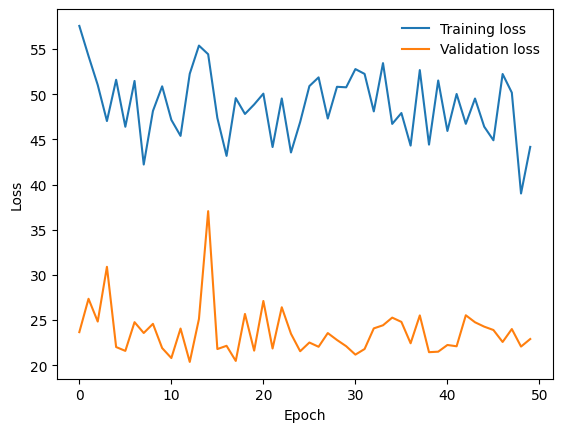

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss curves
plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

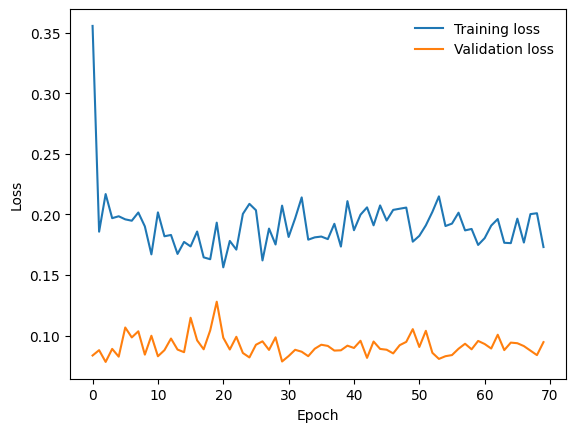

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss curves
plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

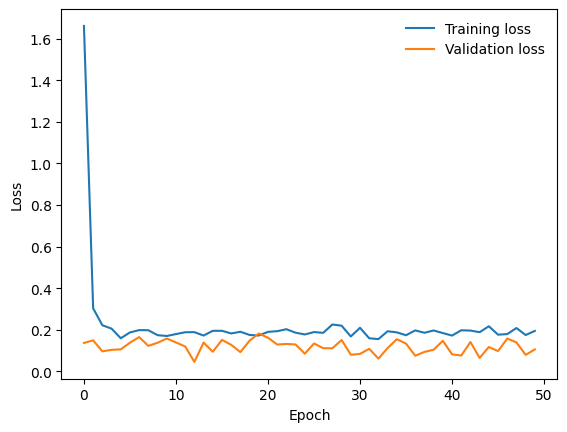

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss curves
plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

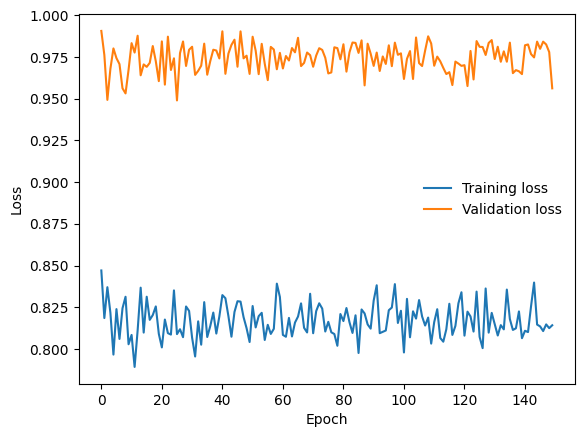

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss curves
plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

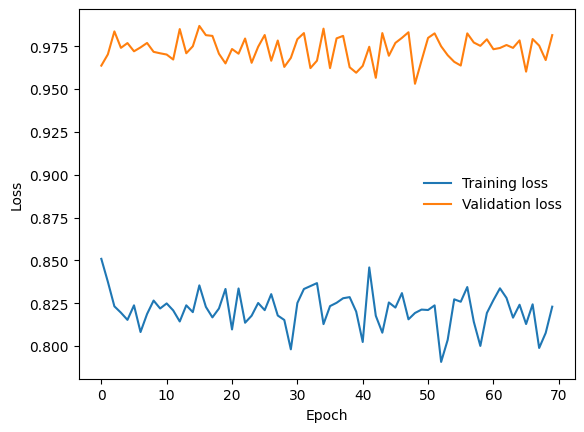

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss curves
plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

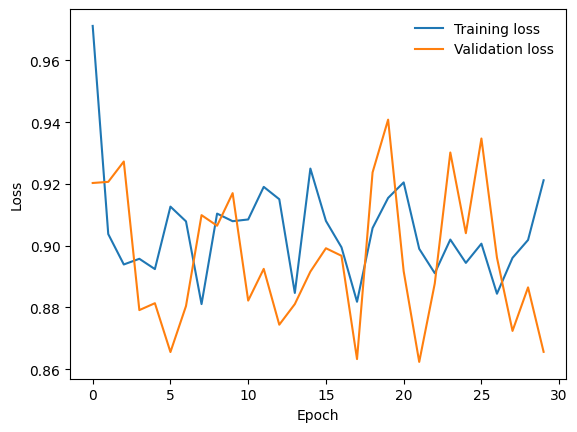

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss curves
plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

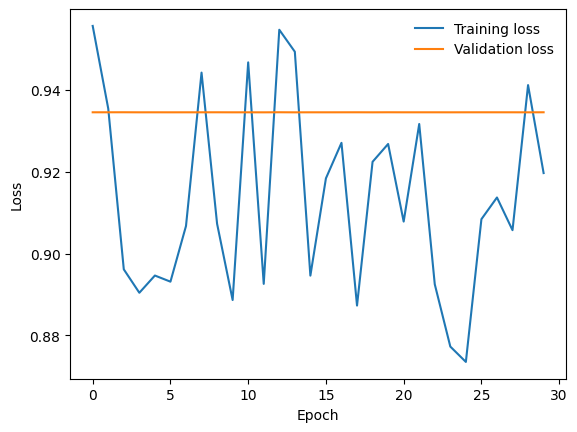

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss curves
plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

(6, 1260, 1260)


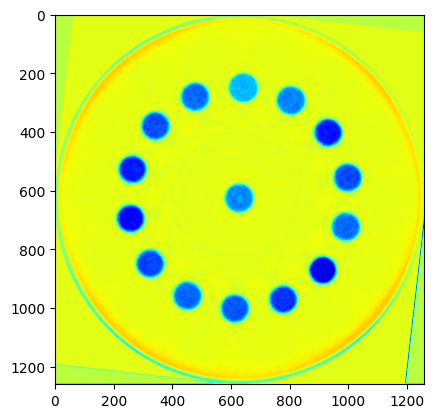

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[0,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


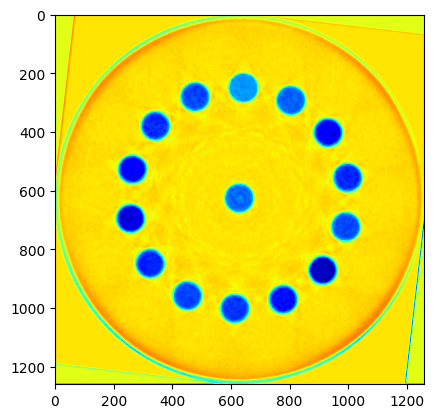

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[1,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


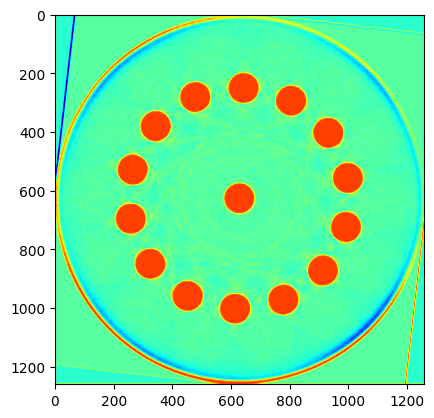

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[2,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


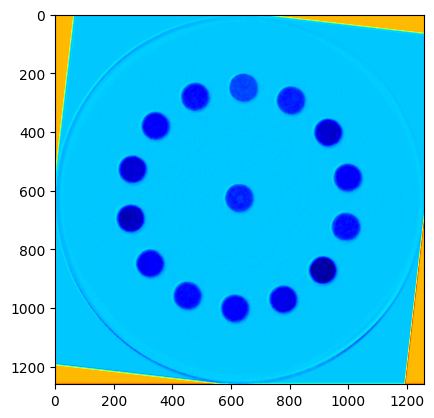

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[3,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


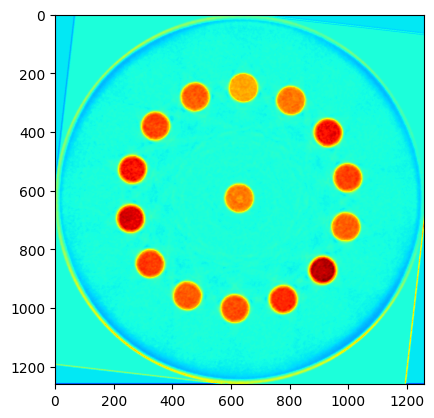

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[4,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


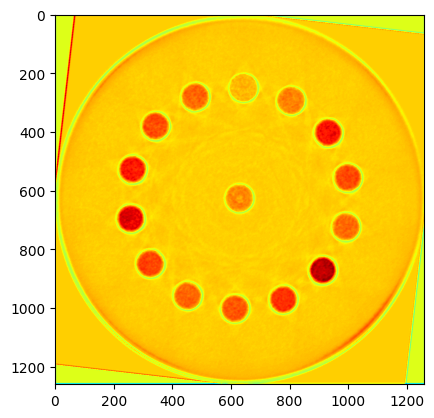

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[5,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


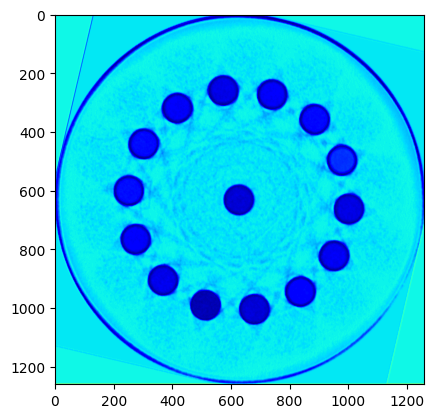

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[0,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


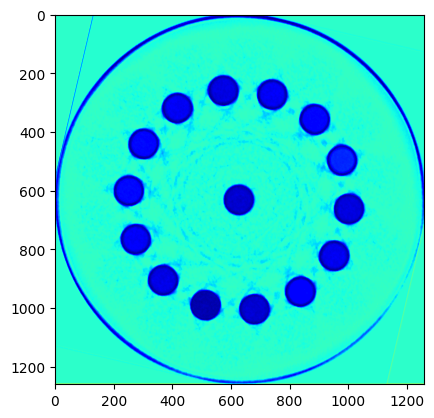

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[1,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


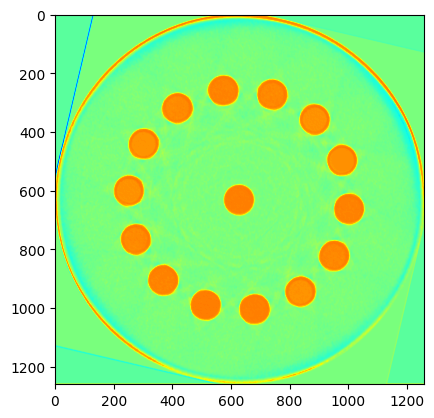

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[2,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


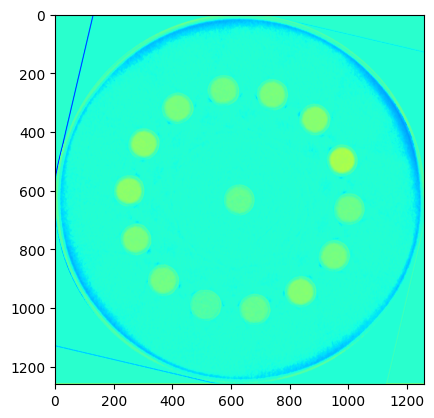

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[3,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


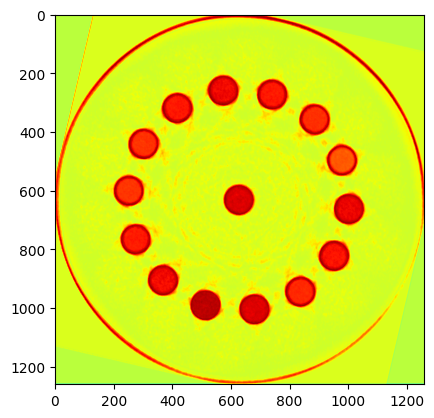

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[4,:,:],cmap='jet')
plt.show()

(6, 1260, 1260)


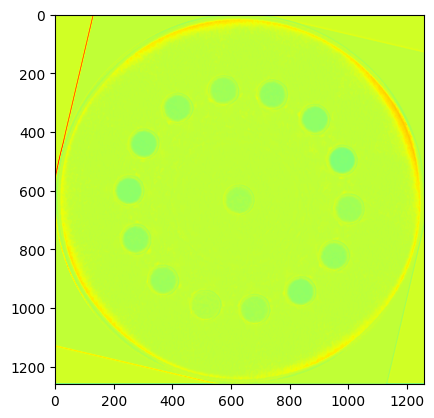

In [ ]:
import matplotlib.pyplot as plt
output.shape
out_tensor = output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[5,:,:],cmap='jet')
plt.show()

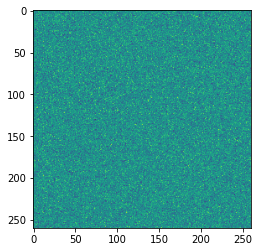

In [ ]:
import matplotlib.pyplot as plt
import torch

out = torch.randn(4, 6, 260, 260)
out_numpy = out[0].cpu().detach().numpy()
out_numpy.shape

import matplotlib.pyplot as plt
plt.imshow(out_numpy[3,:,:])
plt.show()

100%|██████████| 170498071/170498071 [00:04<00:00, 41790433.58it/s]


Extracting data/cifar-10-python.tar.gz to data/


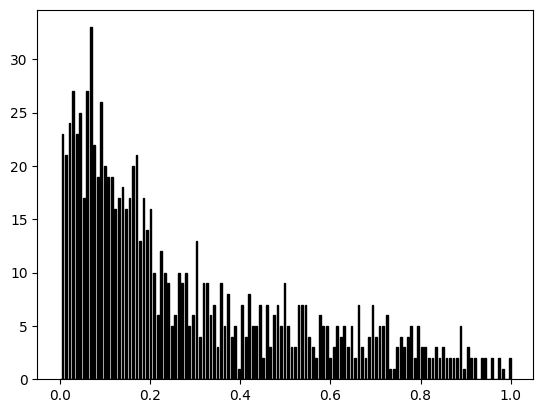

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

# Define transforms to normalize the pixel values to the range [0,1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the CIFAR10 dataset
dataset = datasets.CIFAR10(root='data/', train=True, transform=transform, download=True)

# Get a sample image and plot a histogram of its pixel values
img, _ = dataset[0]
plt.hist(img.numpy().ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()


**Testing the Trained Model**

In [ ]:
# Normalize the test data to have zero mean and unit variance
# test_data = (test_data - np.mean(test_data)) / np.std(test_data)

In [ ]:
import pydicom
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import skimage.util
import torch.optim as optim
from torchvision.transforms import transforms
from torchvision import models

In [ ]:
root_dir = '/content/drive/MyDrive/CT_Data/CT_Data'
path_to_images = '/content/drive/MyDrive/CT_Data/CT_Data/Images'
# type(os.listdir(path_to_images))
path_to_labels = '/content/drive/MyDrive/CT_Data/CT_Data/Labels'

In [ ]:
os.listdir(path_to_labels)
Au_list, Ca_list, Gd_list,I_list,Lipid_list,Water_list = [],[],[],[],[],[]
for folder in os.listdir(path_to_labels):
  a = os.path.join(path_to_labels,folder)
  for files in os.listdir(a):
    path = os.path.join(a,files)
    label = path.split('/')[-2]
    # print(label)
    if label == '1.3.6.1.4.1.56125.2.32.121.Au':
      Au_list.append(path)
    if label == '1.3.6.1.4.1.56125.2.32.121.Ca':
      Ca_list.append(path) 
    if label == '1.3.6.1.4.1.56125.2.32.121.Gd':
      Gd_list.append(path)
    if label == '1.3.6.1.4.1.56125.2.32.121.I':
      I_list.append(path) 
    if label == '1.3.6.1.4.1.56125.2.32.121.Lipid':
      Lipid_list.append(path)
    if label == '1.3.6.1.4.1.56125.2.32.121.Water':
      Water_list.append(path)    

len(Au_list)
len(Ca_list)  

6

In [ ]:
labels = []
for i in range(0,len(Water_list)):
  labels.append([Au_list[i],Ca_list[i],Gd_list[i],I_list[i],Lipid_list[i],Water_list[i]])
len(labels) 

6

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np
import pydicom

class CT_Material_Dataset(nn.Module):
  def __init__(self,root_dir,labels,transform):
    self.ct_path = os.path.join(root_dir, 'Images')
    self.ct_labels_path = labels
    self.transform = transform
    self.ct_filenames = sorted(os.listdir(self.ct_path))

  def __len__(self):
    return len(self.ct_filenames)

  def __getitem__(self,idx,in_train=True):
    ct_filename = self.ct_filenames[idx]
    # print("ct_filenmae",ct_filename)
    ct_image = (pydicom.read_file(os.path.join(self.ct_path,ct_filename)).pixel_array)/255


    ct_label1 = (pydicom.read_file(self.ct_labels_path[idx][0]).pixel_array)/255
    ct_label2 = (pydicom.read_file(self.ct_labels_path[idx][1]).pixel_array)/255
    ct_label3 = (pydicom.read_file(self.ct_labels_path[idx][2]).pixel_array)/255
    ct_label4 = (pydicom.read_file(self.ct_labels_path[idx][3]).pixel_array)/255
    ct_label5 = (pydicom.read_file(self.ct_labels_path[idx][4]).pixel_array)/255
    ct_label6 = (pydicom.read_file(self.ct_labels_path[idx][5]).pixel_array)/255

    ct_label_all = [ct_label1,ct_label2,ct_label3,ct_label4,ct_label5,ct_label6]
    ct_label_all = np.array(ct_label_all)
    
    ct_image = torch.from_numpy(ct_image)
    ct_label_all = torch.from_numpy(ct_label_all).float()
    if self.transform is not None:
        ct_image = self.transform(ct_image)
        ct_label_all = self.transform(ct_label_all)


    return ct_image, ct_label_all



In [ ]:
test_dataset = CT_Material_Dataset(root_dir, labels, transform=None)

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

In [ ]:
a,b = next(iter(test_loader))
print(a.shape, b.shape)
len(test_loader)

torch.Size([2, 5, 1260, 1260]) torch.Size([2, 6, 1260, 1260])


3

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Creating a UNet for SPCCT (Spectral Photon Counting CT)
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(BasicBlock, self).__init__()
        # self.gn1 = nn.GroupNorm(n_groups, in_channels)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        # self.gn2 = nn.GroupNorm(n_groups, in_channels)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

    def forward(self, x):
        residul = x
        x = self.relu1(x)
        x = self.conv1(x)
        x = self.relu2(x)
        x = self.conv2(x)
        # x = x + residul

        return x

class UNet2D(nn.Module):
    """2d unet for Material Decomposition
    Ref:
        Material Decomposition using 2d-UNet. Naveed Ilyas
    Args:
        input_shape: tuple, (channel,height, width)
    """

    def __init__(self,in_channels=5, out_channels=6, init_channels=32, p=0.2):
        super(UNet2D, self).__init__()
        #self.input_shape = input_shape
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.init_channels = init_channels
        self.make_encoder()
        self.make_decoder()
        self.dropout = nn.Dropout(p=p)

    def make_encoder(self):
        init_channels = self.init_channels
        self.conv1a = nn.Conv2d(self.in_channels, init_channels, 3, padding=1)
        self.conv1b = BasicBlock(init_channels, init_channels)  # 32

        self.ds1 = nn.Conv2d(init_channels, init_channels * 2, 3, stride=2, padding=1)  # down sampling and add channels

        self.conv2a = BasicBlock(init_channels * 2, init_channels * 2)
        self.conv2b = BasicBlock(init_channels * 2, init_channels * 2)

        self.ds2 = nn.Conv2d(init_channels * 2, init_channels * 4, 3, stride=2, padding=2)

        self.conv3a = BasicBlock(init_channels * 4, init_channels * 4)
        self.conv3b = BasicBlock(init_channels * 4, init_channels * 4)

        self.ds3 = nn.Conv2d(init_channels * 4, init_channels * 8, 3, stride=2, padding=1)
        # self.ds3 = nn.Conv2d(init_channels * 4, init_channels * 8, 3, stride=2, padding=0)

        self.conv4a = BasicBlock(init_channels * 8, init_channels * 8)
        self.conv4b = BasicBlock(init_channels * 8, init_channels * 8)
        self.conv4c = BasicBlock(init_channels * 8, init_channels * 8)
        self.conv4d = BasicBlock(init_channels * 8, init_channels * 8)

    def make_decoder(self):
        init_channels = self.init_channels
        self.up4conva = nn.Conv2d(init_channels * 8, init_channels * 4, 1)
        self.up4 = nn.Upsample(scale_factor=2)  # mode='bilinear'
        self.up4convb = BasicBlock(init_channels * 4, init_channels * 4)

        self.up3conva = nn.Conv2d(init_channels * 4, init_channels * 2, 1)
        self.up3 = nn.Upsample(scale_factor=2)
        self.up31 = nn.Conv2d(init_channels * 2,init_channels * 2,kernel_size=3,stride=1,padding=0)
        self.up3convb = BasicBlock(init_channels * 2, init_channels * 2)

        self.up2conva = nn.Conv2d(init_channels * 2, init_channels, 1)
        self.up2 = nn.Upsample(scale_factor=2)
        self.up2convb = BasicBlock(init_channels, init_channels)

        self.up1conv = nn.Conv2d(init_channels, self.out_channels, 1)

    def forward(self, x):
        c1 = self.conv1a(x)
        c1 = self.conv1b(c1)
        c1d = self.ds1(c1)

        c2 = self.conv2a(c1d)
        c2 = self.conv2b(c2)
        # print("c2",c2.shape)
        c2d = self.ds2(c2)

        c3 = self.conv3a(c2d)
        c3 = self.conv3b(c3)
        
        c3d = self.ds3(c3)
        # print("c3",c3.shape)
        c4 = self.conv4a(c3d)
        c4 = self.conv4b(c4)
        c4 = self.conv4c(c4)
        c4d = self.conv4d(c4)

        c4d = self.dropout(c4d)

        u4 = self.up4conva(c4d)
        # print("u4",u4.shape)
        u4 = self.up4(u4)
        # print("u4",u4.shape)
        u4 = u4 + c3
        u4 = self.up4convb(u4)

        u3 = self.up3conva(u4)
        u3 = self.up3(u3)
        u3 = self.up31(u3)
        # print("u3",u3.shape)
        u3 = u3 + c2
        u3 = self.up3convb(u3)

        u2 = self.up2conva(u3)
        u2 = self.up2(u2)
        u2 = u2 + c1
        u2 = self.up2convb(u2)

        uout = self.up1conv(u2)
        # uout = F.sigmoid(uout)
        uout = F.softmax(uout)

        return uout

# if __name__ == "__main__":
#     #input  = torch.randn(1,4,160,192,128)
#     input = torch.randn(1, 5, 260, 260)
#     input = torch.randn(1, 5, 1260, 1260)
#     #input = torch.randn(1, 4, 164, 164, 164)
#     #input2 = torch.randn((1,8,100,100,60))
#     model = UNet2D()
#     output = model(input)
#     print(output.shape) 
    # print(output.shape)  

In [ ]:
import torch
checkpoint_path = '/content/drive/MyDrive/CT_Data/CT_Data/Saving_Modelsmy_model_checkpoint_2.pth'
checkpoint = torch.load(checkpoint_path)
# checkpoint['model_state_dict']['']['loss']
checkpoint.keys()
model = UNet2D()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
model.load_state_dict(checkpoint['model_state_dict'])


<All keys matched successfully>

In [ ]:

valid_loss = 0
model.eval()
for i, data in enumerate(test_loader):
  images, labels = data
  images = images.to(device)
  labels = labels.to(device)
  predicted_output = model(images.float())
  loss = criterion(predicted_output,labels)
  valid_loss += loss.item()
print(f' \t\t Valid loss: {valid_loss/len(test_loader)}')

<ipython-input-10-cb4fe42f3fde>:129: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  uout = F.softmax(uout)


 		 Valid loss: 17.372819900512695


In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
valid_loss = 0
y_true = []
y_pred = []
similarity_matrices = []
model.eval()
for i, data in enumerate(test_loader):
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    predicted_output = model(images.float())
    loss = criterion(predicted_output, labels)
    valid_loss += loss.item()

    # calculate metrics
    pred_labels = torch.argmax(predicted_output, dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()
    y_true.append(true_labels)
    y_pred.append(pred_labels)

    # calculate cosine similarity matrix
    # features = model(images.float(), extract_features=True)
    # features = features.detach().cpu().numpy()
    # sim_matrix = cosine_similarity(features)
    # similarity_matrices.append(sim_matrix)

valid_loss /= len(test_loader)
print(f'Valid loss: {valid_loss}')

# calculate and print accuracy score
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# calculate and print mean absolute error
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error: {mae}')

# calculate and print average cosine similarity matrix
similarity_matrices = np.concatenate(similarity_matrices, axis=0)
avg_sim_matrix = np.mean(similarity_matrices, axis=0)
print(f'Average Cosine Similarity Matrix: {avg_sim_matrix}')

<ipython-input-10-cb4fe42f3fde>:129: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  uout = F.softmax(uout)


Valid loss: 17.372819900512695


ValueError: ignored

(6, 1260, 1260)


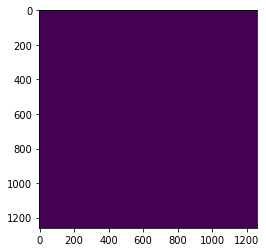

In [ ]:
import matplotlib.pyplot as plt
predicted_output.shape
out_tensor = predicted_output[0]
out_numpy = out_tensor.cpu().detach().numpy()
print(out_numpy.shape)

plt.imshow(out_numpy[3,:,:])
plt.show()